# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Uma M Subramanian
### Repo link: https://github.com/umams2002/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Task 0: Prerequisite

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

## Task 1

 Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [25]:
import requests

url = "https://bloggingfordevs.com/dotnet-blogs/"
response = requests.get(url)

if response.status_code == 200:
    # Save the HTML content to a file
    with open("article_01.html", "w", encoding="utf-8") as file:
        file.write(response.text)
        print("HTML content saved to article.html")
else:
    print("Failed to fetch HTML content")

HTML content saved to article.html


## Task 2

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [26]:
import nltk
nltk.download('punkt')
from textblob import TextBlob
from bs4 import BeautifulSoup

with open("article_01.html", "r", encoding="utf-8") as file:
    html_content = file.read()
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity
sentences_count = len (blob.sentences)

print(f"Sentiment Polarity Score: {polarity_score:.2f}")
print(f"Number of Sentences: {sentences_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A2645055\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Sentiment Polarity Score: 0.22
Number of Sentences: 49


## Task 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [27]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

tokens = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop]
token_counter = Counter(tokens)
most_common_tokens = token_counter.most_common(5)

# Print the 5 most frequent tokens
print("5 Most Common Tokens:")
for token, frequency in most_common_tokens:
    print(f"{token}: {frequency}")

# Print all tokens and their frequencies
print("\nAll Tokens and Their Frequencies:")
for token, frequency in token_counter.items():
    print(f"{token}: {frequency}")


5 Most Common Tokens:
c: 12
post: 12
trending: 11
blog: 10
writes: 9

All Tokens and Their Frequencies:
best: 4
blogs: 3
c: 12
developers: 5
read: 1
app: 1
works: 2
javascript: 2
enabled: 1
blogging: 2
devs: 2
trendsit: 1
free: 1
coursetoday: 1
blogsupdated: 1
hourly: 1
blogstrending: 1
nownewlast: 1
code: 6
stevearticles: 1
core: 4
emphasis: 1
performance: 4
topics: 5
good: 1
mix: 1
depth: 1
coverage: 1
particularly: 1
author: 3
steve: 3
gordon: 2
microsoft: 4
mvp: 3
pluralsight: 2
trending: 11
post: 12
concurrent: 1
hosted: 1
service: 1
start: 1
stop: 1
opinionderek: 1
writes: 9
recent: 3
articles: 2
discuss: 1
architectural: 1
like: 2
scaling: 1
monoliths: 1
event: 3
choreography: 1
orchestration: 1
runs: 1
youtube: 1
channel: 1
sourcing: 1
vs: 1
driven: 1
architecture: 2
tiredjason: 1
azure: 7
testing: 3
fundamentals: 2
blog: 10
tired: 1
written: 3
multiple: 1
books: 1
time: 2
scott: 2
hanselman: 1
blogscott: 2
ecosystem: 1
cloud: 1
computing: 2
software: 7
development: 9
windows: 

## Task 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [28]:
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
most_common_lemmas = Counter(lemmas).most_common(5)

# Print the common lemmas
print("5 Most Common Lemmas:")
for lemma, frequency in most_common_lemmas:
    print(f"{lemma}: {frequency}")

# Print all lemmas with their frequencies
print("\nAll Lemmas with Frequencies:")
lemma_counter = Counter(lemmas)
for lemma, frequency in lemma_counter.items():
    print(f"{lemma}: {frequency}")


5 Most Common Lemmas:
post: 15
write: 13
c: 12
trend: 11
blog: 11

All Lemmas with Frequencies:
good: 4
blogs: 2
c: 12
developer: 8
read: 1
app: 1
work: 5
well: 2
javascript: 2
enable: 1
blogge: 2
devs: 2
trendsit: 1
free: 1
coursetoday: 1
blogsupdated: 1
hourly: 1
blogstrende: 1
nownewlast: 1
code: 7
stevearticles: 1
core: 4
emphasis: 1
performance: 4
topic: 6
mix: 1
depth: 1
coverage: 1
particularly: 1
author: 4
steve: 3
gordon: 2
microsoft: 4
mvp: 3
pluralsight: 2
trend: 11
post: 15
concurrent: 1
hosted: 1
service: 1
start: 1
stop: 1
opinionderek: 1
write: 13
recent: 3
article: 2
discuss: 1
architectural: 1
like: 2
scale: 1
monolith: 1
event: 3
choreography: 1
orchestration: 1
run: 1
youtube: 1
channel: 1
sourcing: 1
vs: 1
driven: 1
architecture: 2
tiredjason: 1
azure: 7
testing: 3
fundamental: 2
blog: 11
tired: 1
multiple: 1
book: 2
time: 2
scott: 2
hanselman: 1
blogscott: 2
ecosystem: 1
cloud: 1
computing: 2
software: 7
development: 9
windows: 2
advocate: 1
ssh: 1
external: 1
mach

## Task 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

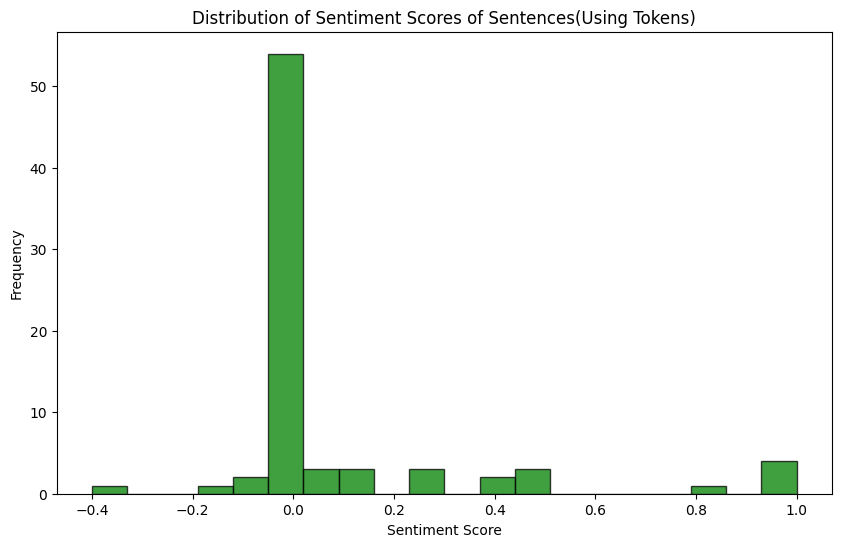

In [29]:
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]
sentence_scores = []
for sentence in sentences:
    blob = TextBlob(sentence)
    sentence_scores.append(blob.sentiment.polarity)

plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20,color='green',edgecolor='black', alpha=0.75)
plt.title("Distribution of Sentiment Scores of Sentences(Using Tokens)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

## Task 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

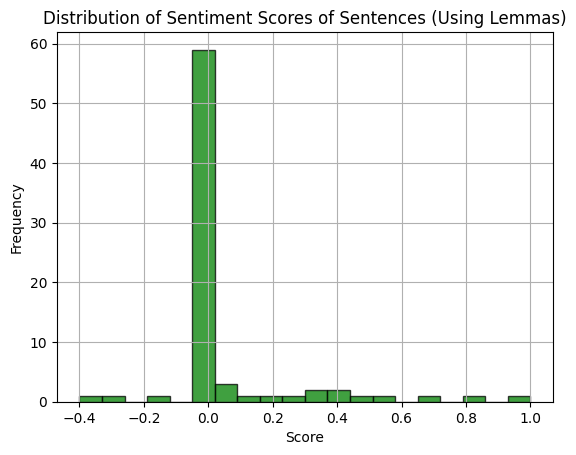

In [30]:
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

sentence_lemmas = [[token.lemma_.lower() for token in sent if not token.is_punct and not token.is_stop] for sent in doc.sents]
sentence_scores = []
for sentence in sentence_lemmas:
    if sentence:
        blob = TextBlob(' '.join(sentence))
        sentence_scores.append(blob.sentiment.polarity)

plt.hist(sentence_scores, bins=20,color='green', edgecolor='black', alpha=0.75)
plt.title("Distribution of Sentiment Scores of Sentences (Using Lemmas)")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Task 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.2
* Cutoff Score (lemmas): 0.2

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

## Task 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [31]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]
your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)

print("Summary:")
print(summary_text)

Summary:
18 Best .NET Blogs for C# Developers to Read in 2021This app works best with JavaScript enabled. Blogging for Devs TrendsIt's free:Blogging for Devs CourseToday's 18 Best .NET A good mix of in depth coverage of C# topics, particularly around performance. TRENDING POST:Contract first OpenAPI development (but still use Swagger UI with ASP.NET Core).NETSoftware Development0points7. Swimburger.NET BlogSwimburger.net is a blog about .NET, C#, Web Development, Azure, Umbraco, and more authored by Niels Swimberghe. Recently he's written about how hypermedia can help you design web API's and how to do it in a type safe way with TypeScript. TRENDING POST:The Perfect Pot.NETSoftware Development0points14. NET0points7-Day History • Top 10PointsRankLike this collection of .NET blogs?We're trying to create the best place to find quality and creative content, written by individual developers and technical experts. Plus, thanks to everyone who's submitted their favorite blogs so far! We'd lov

## Task 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [34]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score of the Summary (Token Scores):", summary_polarity_score)
num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)


Polarity Score of the Summary (Token Scores): 0.5115079365079366
Number of Sentences in Summarized Article: 13


## Task 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [35]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]
your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)
print("Summary:")
print(summary_text)

Summary:
18 Best .NET Blogs for C# Developers to Read in 2021This app works best with JavaScript enabled. Blogging for Devs TrendsIt's free:Blogging for Devs CourseToday's 18 Best .NET A good mix of in depth coverage of C# topics, particularly around performance. TRENDING POST:Contract first OpenAPI development (but still use Swagger UI with ASP.NET Core).NETSoftware Development0points7. Swimburger.NET BlogSwimburger.net is a blog about .NET, C#, Web Development, Azure, Umbraco, and more authored by Niels Swimberghe. Recently he's written about how hypermedia can help you design web API's and how to do it in a type safe way with TypeScript. TRENDING POST:The Perfect Pot.NETSoftware Development0points14. NET0points7-Day History • Top 10PointsRankLike this collection of .NET blogs?We're trying to create the best place to find quality and creative content, written by individual developers and technical experts. Plus, thanks to everyone who's submitted their favorite blogs so far! We'd lov

## Task 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [36]:
import spacy
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.2
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score of Summary (Lemma Scores):", summary_polarity_score)
num_summary_sentences = len(summary_sentences)
print("Number of Sentences in Summarized Article:", num_summary_sentences)

Polarity Score of Summary (Lemma Scores): 0.5115079365079366
Number of Sentences in Summarized Article: 13


## Task 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores of the summaries based on tokens and lemmas are likely to be different from the polarity score of the initial article. Here are the scores
The polarity score of initial article is 0.22 
The polarity score of summary (Token Scores) is 0.51
The polarity score of summary (Lemma Scores) is 0.51

## Task 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

The summary be the better one because of less number of sentences.